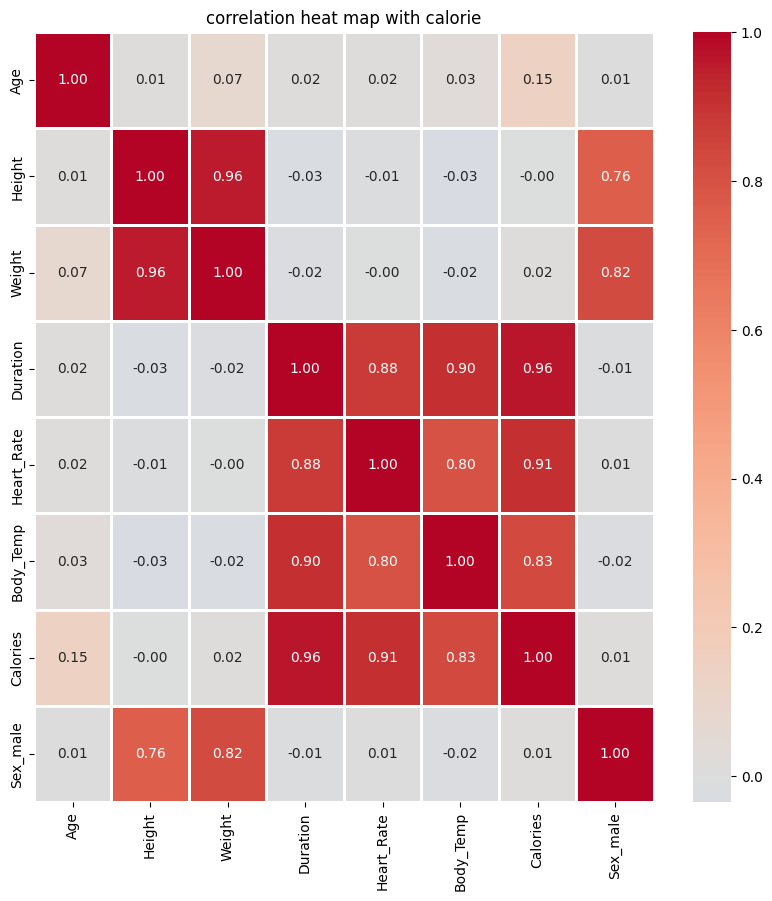

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import trainning data
data = pd.read_csv(r'c:\Users\DUSHYANT\Downloads\playground-series-s5e5\train.csv')
data.drop(columns=["id"],inplace=True)
data=pd.get_dummies(data,columns=["Sex"],drop_first=True)
corr_matrix=data.corr()
calorie_corr=corr_matrix[["Calories"]].sort_values(by="Calories",ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt=".2f",
    linewidths=0.8
)
plt.title("correlation heat map with calorie")
plt.show()

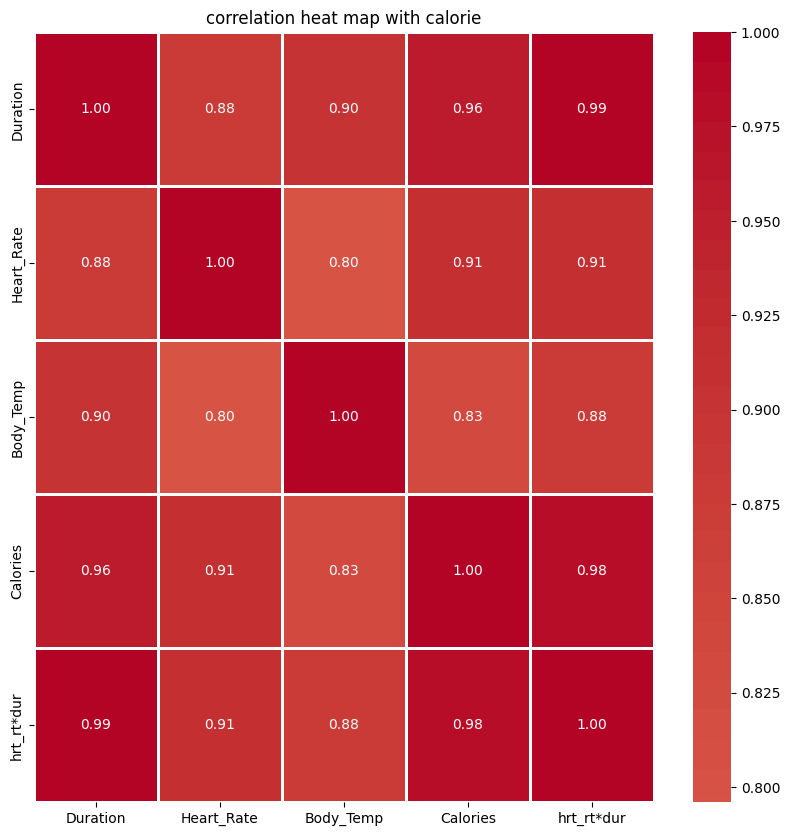

In [5]:
# import required libraries
import numpy as np
from sklearn.metrics import root_mean_squared_error,r2_score,mean_squared_log_error


# feature engineering
data["hrt_rt*dur"]=data["Heart_Rate"]*data["Duration"]
data=data.drop(columns=["Height","Sex_male",'Age','Weight'])
X = data.drop(columns=["Calories"])
#target variables
y = data['Calories']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

plt.figure(figsize=(10,10))
sns.heatmap(
    data.corr(),
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt=".2f",
    linewidths=0.8
)
plt.title("correlation heat map with calorie")
plt.show()

In [9]:
for col in data.columns:
    print(col,data[col].min(),data[col].max())

Duration 1.0 30.0
Heart_Rate 67.0 128.0
Body_Temp 37.1 41.5
Calories 1.0 289.0
hrt_rt*dur 67.0 3840.0


In [6]:
Q1 = data['Calories'].quantile(0.25)
Q3 = data['Calories'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame
data = data[(data['Calories'] >= lower_bound) & (data['Calories'] <= upper_bound)]


Epoch 1/50


C:\Users\DUSHYANT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9367 - val_loss: 0.1592
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1543 - val_loss: 0.1443
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1439 - val_loss: 0.1420
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1426 - val_loss: 0.1407
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1416 - val_loss: 0.1373
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1385 - val_loss: 0.1371
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1376 - val_loss: 0.1358
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1372 - val_loss: 0.1358
Epoch 9/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1370 - val_loss: 0.1353
Epoch 10/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1367 - val_loss: 0.1352
Epoch 11/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1365 - val_loss: 0.1356
Epoch 12/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.

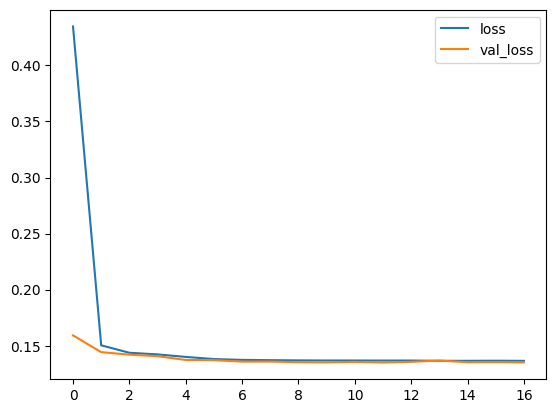

In [8]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

#  definr loss
from tensorflow.keras import backend as K
def rmlse(y_true, y_pred):
    # Clip predictions and true values to avoid log(0)
    y_pred = K.clip(y_pred, K.epsilon(), None)
    y_true = K.clip(y_true, K.epsilon(), None)
    
    # Compute Mean Squared Logarithmic Error
    msle = K.mean(K.square(K.log(y_pred + 1) - K.log(y_true + 1)))
    
    # Return square root of MSLE
    return K.sqrt(msle)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# X_train=X_train.sample(50000)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
model=Sequential()
fn='relu'
model.add(Dense(2,activation=fn,input_dim=X_train.shape[1],kernel_initializer='he_uniform'))
model.add(Dense(50,activation=fn,kernel_initializer='he_normal'))
model.add(Dense(50,activation=fn,kernel_initializer='he_normal'))
model.add(Dense(50,activation=fn,kernel_initializer='he_normal'))
model.add(Dense(50,activation=fn,kernel_initializer='he_normal'))


model.add(Dense(1,activation="linear"))
callback=EarlyStopping(monitor='val_loss',
                       min_delta=0.001,
                       patience=10,
                       mode='auto',
                       baseline=None,
                       restore_best_weights=True)
model.compile(loss=rmlse,optimizer='Adam')
history=model.fit(X_train,y_train,
                  epochs=50,
                  validation_split=0.2,
                  batch_size=512,
                  callbacks=callback)

y_pred=model.predict(X_test)
from sklearn.metrics import r2_score


import matplotlib.pyplot as plt
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.legend()

print(f'rmse:{root_mean_squared_error(y_test,y_pred)}')
print(f'r2 score:{r2_score(y_test,y_pred)}')

In [ ]:
# Save the ANN model
model.save('calorie_ann_model.keras')

# Save the scaler
import joblib
joblib.dump(scaler, 'scaler.pkl')
